In [ ]:
#libraries
import pandas as pd
import numpy as np
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
df=pd.read_csv("/content/Train.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29451 entries, 0 to 29450
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   POSTED_BY              29451 non-null  object 
 1   UNDER_CONSTRUCTION     29451 non-null  int64  
 2   RERA                   29451 non-null  int64  
 3   BHK_NO.                29451 non-null  int64  
 4   BHK_OR_RK              29451 non-null  object 
 5   SQUARE_FT              29451 non-null  float64
 6   READY_TO_MOVE          29451 non-null  int64  
 7   RESALE                 29451 non-null  int64  
 8   ADDRESS                29451 non-null  object 
 9   LONGITUDE              29451 non-null  float64
 10  LATITUDE               29451 non-null  float64
 11  TARGET(PRICE_IN_LACS)  29451 non-null  float64
dtypes: float64(4), int64(5), object(3)
memory usage: 2.7+ MB


In [ ]:
# Splitting the "ADDRESS" column into "CITY" and "STATE" columns
df[["CITY", "STATE"]] = df["ADDRESS"].str.split(",", n=1, expand=True)

# Droping"ADDRESS" column
df = df.drop(columns=["ADDRESS"])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29451 entries, 0 to 29450
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   POSTED_BY              29451 non-null  object 
 1   UNDER_CONSTRUCTION     29451 non-null  int64  
 2   RERA                   29451 non-null  int64  
 3   BHK_NO.                29451 non-null  int64  
 4   BHK_OR_RK              29451 non-null  object 
 5   SQUARE_FT              29451 non-null  float64
 6   READY_TO_MOVE          29451 non-null  int64  
 7   RESALE                 29451 non-null  int64  
 8   LONGITUDE              29451 non-null  float64
 9   LATITUDE               29451 non-null  float64
 10  TARGET(PRICE_IN_LACS)  29451 non-null  float64
 11  CITY                   29451 non-null  object 
 12  STATE                  29451 non-null  object 
dtypes: float64(4), int64(5), object(4)
memory usage: 2.9+ MB


In [ ]:
#top 5 expensive houses
df.nlargest(n=5, columns='TARGET(PRICE_IN_LACS)')

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS),CITY,STATE
11238,Dealer,0,0,3,BHK,1.875000e+08,1,1,13.018900,77.596300,30000.0,R.T. Nagar,Bangalore
10745,Owner,0,0,3,BHK,2.545455e+08,1,1,13.021000,77.938000,28000.0,Malur,Bangalore
15724,Owner,0,0,2,BHK,8.064516e+07,1,1,12.795926,77.331535,25000.0,Lakkasandra,Bangalore
5967,Dealer,1,1,2,BHK,5.422570e+04,0,0,19.180000,72.963330,9990.0,Thane West,Lalitpur
10637,Dealer,1,1,3,BHK,8.322835e+04,0,0,18.627000,73.782900,9910.0,Chinchwad,Pune


<ipython-input-6-6a214709bd7a>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation =df.corr()


<Axes: >

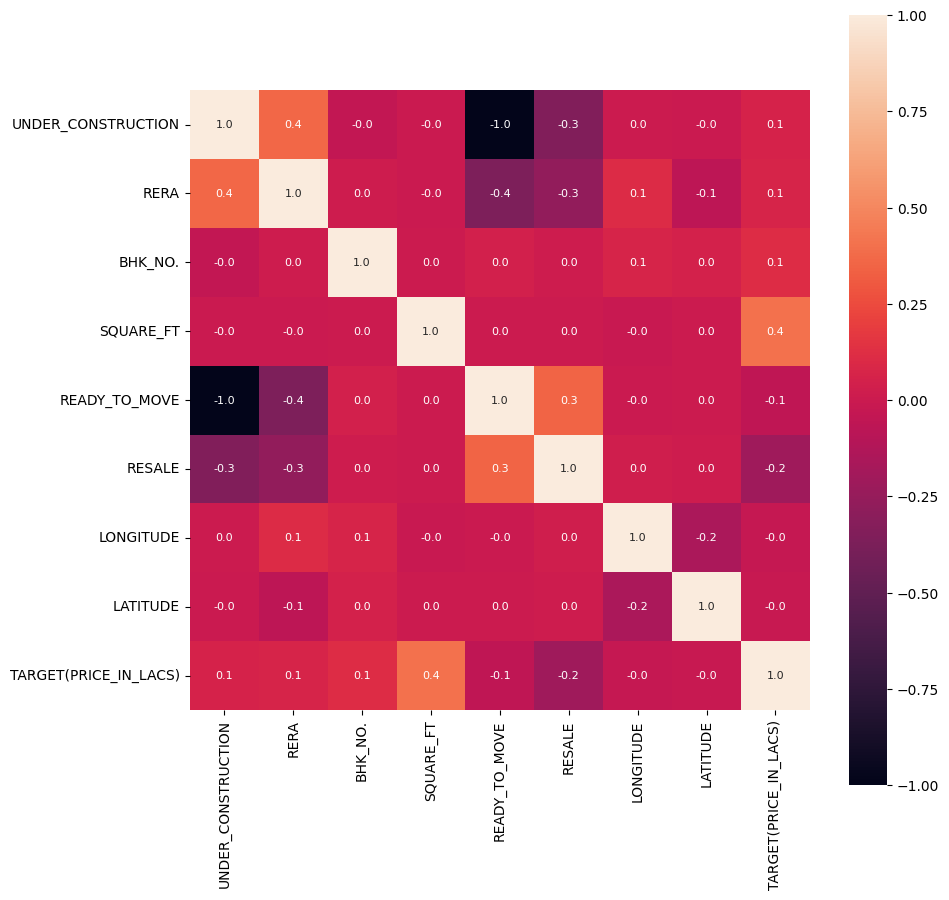

In [ ]:
correlation =df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt=".1f", annot=True, annot_kws={"size":8})

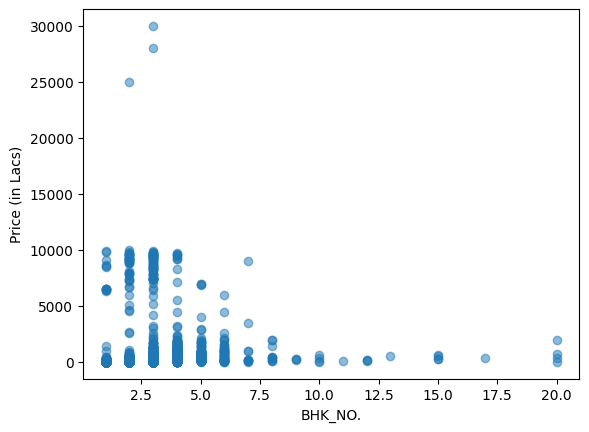

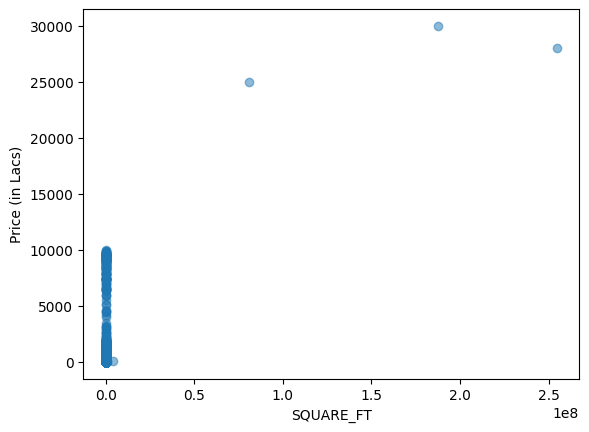

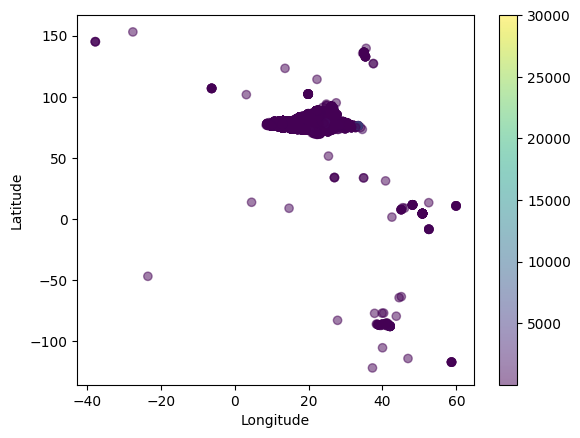

In [ ]:

plt.scatter(df['BHK_NO.'], df['TARGET(PRICE_IN_LACS)'], alpha=0.5)
plt.xlabel('BHK_NO.')
plt.ylabel('Price (in Lacs)')
plt.show()

plt.scatter(df['SQUARE_FT'], df['TARGET(PRICE_IN_LACS)'], alpha=0.5)
plt.xlabel('SQUARE_FT')
plt.ylabel('Price (in Lacs)')
plt.show()

plt.scatter(df['LONGITUDE'], df['LATITUDE'], c=df['TARGET(PRICE_IN_LACS)'], alpha=0.5)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar()
plt.show()


In [ ]:
#splitting
train_df = pd.read_csv('/content/Train.csv')
test_df = pd.read_csv('/content/Test.csv')

X_train = train_df.drop('TARGET(PRICE_IN_LACS)', axis=1)
y_train = train_df['TARGET(PRICE_IN_LACS)']

In [ ]:
# Preprocessing the train data
X_train = pd.get_dummies(X_train, columns=['POSTED_BY', 'BHK_OR_RK'])
X_train.drop(['ADDRESS'], axis=1, inplace=True)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train[['SQUARE_FT', 'LONGITUDE', 'LATITUDE']] = scaler.fit_transform(X_train[['SQUARE_FT', 'LONGITUDE', 'LATITUDE']])

# Preprocessing the test data
X_test = pd.get_dummies(test_df, columns=['POSTED_BY', 'BHK_OR_RK'])
X_test.drop(['ADDRESS'], axis=1, inplace=True)
X_test[['SQUARE_FT', 'LONGITUDE', 'LATITUDE']] = scaler.transform(X_test[['SQUARE_FT', 'LONGITUDE', 'LATITUDE']])

In [ ]:
#SVM model
svm = SVR(kernel='rbf')
svm.fit(X_train, y_train)

y_pred = svm.predict(X_test)

#CSV FILE CREATED IN FILE
pred_df = pd.DataFrame({'TARGET(PRICE_IN_LACS)': y_pred})
pred_df.to_csv('predictions.csv', index=False)
